In [294]:
# 모듈로딩
from keras import Sequential  # 모댈 객체
from keras.layers import Dense, Dropout  # layer 객체
from keras.datasets.boston_housing import load_data
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt

# [1] 데이터 로딩

In [295]:
# 학습용 / 테스트용 => 8:2
(x_train, y_train), (x_test, y_test) = load_data()
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [296]:
x_train[:1], y_train[0]

(array([[  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
          91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
          18.72   ]]),
 15.2)

### [1-1] 전처리
- 특성(feature)의 값의 범위 처리
    - 수치 데이터 : 값의 범위 맞추기(스케일링)
    - 문자 데이터 : 수치화(인코딩)

In [297]:
scaler = StandardScaler()

In [298]:
scaler.fit(x_train)

StandardScaler()

In [299]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# [2] NN Model 실습
- (1) 모델 구상
- (2) 모델 생성
- (3) 학습
- (4) 평가
- (5) 테스트

### [2-1] 모델 구상
- 입력 데이터 => 13개의 Feature
- 출력 데이터 => 1개    집값

In [300]:
# NN model의 layer를 층층이 담아서 관리하는 객체
model = Sequential(name='Boston')

In [301]:
# layer 추가하기
model.add(Dense(10, activation='relu', input_shape=(13,), name='input_layer'))
model.add(Dense(10, activation='relu', name='hidden_layer'))
# 과적합을 해결하기 위한 Dropout() 사용 : 랜덤으로 지정된 비율만큼 node를 비활성화 시킴
model.add(Dropout(0.5))
# 회귀 => 출력층 세팅
model.add(Dense(1, activation='linear', name='output_layer'))

In [302]:
# model 구성 확인하기
model.summary()

Model: "Boston"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                140       
                                                                 
 hidden_layer (Dense)        (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


### [2-2] 모델 생성
- Sequential 클래스의 compile 메서드 사용
- 모델이 동작하기 위해서 필요한 설정
    - 오차 계산 함수 설정 => loss
        - 회귀 : MAE, MSE, RMSE
        - 분류 : crossentropy => (이진분류일때 : binary_crossentropy / 다중분류일때 : categorical_crossentropy, sparse_categorycal_crossentropy)
    - 최적화 즉, W, B최적화 방식 설정 => optimizer
        - Default : rmsprop
        - 변경 : adam, momonent, ... (최적화 클래스 이름 문자열 입력 혹은 객체 입력)
    - 모델의 성능 측정 항목 설정 => metrics
        - Default : loss
        - 변경 : 클래스 이름 문자열 입력
- 파라미터 값들
    - str 타입으로 입력 가능
    - 또는, 객체 타입으로 입력 가능

In [303]:
model.compile(loss='MSE', optimizer='adam', metrics=['mae'])

### [2-3] 학습
- fit() 메서드 사용
    - epochs
        - Default : 1(처음~끝까지 학습 횟수)
    - batch_size
        - Default : 32(한번에 학습할 데이터의 양)
    - validation_split
        - 학습 데이터의 일부를 검증용으로 분리(0.0~1.0사이의 값)
    - validation_data
        - 테스트 데이터, 테스트 타겟
    - callback
        - 학습 시 발생하는 이벤트 처리 함수 등록
    - 반환값 => history 객체
        - 형태 : dict 형태
        - Default : 학습 데이터에 대한 loss값 저장

In [304]:
# 검증 데이터에 대한 loss값이 3번 연속 개선되지 않으면 중지하는 callback 생성
stopCb = EarlyStopping(monitor='val_loss', patience=10)

In [305]:
result = model.fit(x_train, y_train,
                   epochs=300,
                   batch_size=10,
                   validation_data=(x_test, y_test),
                   callbacks=[stopCb])
                    # validation_split=0.2)

Epoch 1/300
41/41 [==============================] - 0s 3ms/step - loss: 1100.1770 - mae: 25.0897 - val_loss: 243.8054 - val_mae: 13.1303
Epoch 2/300
41/41 [==============================] - 0s 1ms/step - loss: 475.3465 - mae: 17.7569 - val_loss: 209.2318 - val_mae: 11.7763
Epoch 3/300
41/41 [==============================] - 0s 1ms/step - loss: 404.0776 - mae: 15.9351 - val_loss: 248.5563 - val_mae: 13.1483
Epoch 4/300
41/41 [==============================] - 0s 1ms/step - loss: 365.1242 - mae: 15.5977 - val_loss: 240.3651 - val_mae: 12.8532
Epoch 5/300
41/41 [==============================] - 0s 1ms/step - loss: 371.5934 - mae: 15.9015 - val_loss: 241.6927 - val_mae: 12.9178
Epoch 6/300
41/41 [==============================] - 0s 2ms/step - loss: 368.2720 - mae: 15.4558 - val_loss: 238.3161 - val_mae: 12.8323
Epoch 7/300
41/41 [==============================] - 0s 2ms/step - loss: 366.2524 - mae: 15.5552 - val_loss: 240.3381 - val_mae: 12.9147
Epoch 8/300
41/41 [=====================

In [306]:
# 학습 후 학습 결과 체크 => history 객체
type(result), result.params

(keras.callbacks.History, {'verbose': 1, 'epochs': 300, 'steps': 41})

In [307]:
result.history, result.history.keys()

({'loss': [1100.177001953125,
   475.3465270996094,
   404.07763671875,
   365.1241760253906,
   371.5934143066406,
   368.27197265625,
   366.25244140625,
   297.1300964355469,
   329.9623718261719,
   322.3099365234375,
   325.1485290527344,
   352.4379577636719],
  'mae': [25.089677810668945,
   17.756874084472656,
   15.93510913848877,
   15.59774112701416,
   15.901508331298828,
   15.45583438873291,
   15.555156707763672,
   13.999740600585938,
   14.497973442077637,
   14.020938873291016,
   14.111472129821777,
   14.827094078063965],
  'val_loss': [243.80535888671875,
   209.23184204101562,
   248.55628967285156,
   240.3650665283203,
   241.6927490234375,
   238.31610107421875,
   240.3380584716797,
   215.57640075683594,
   229.8111572265625,
   228.8396759033203,
   217.9320068359375,
   224.86012268066406],
  'val_mae': [13.130334854125977,
   11.776263236999512,
   13.148321151733398,
   12.853177070617676,
   12.917784690856934,
   12.832283020019531,
   12.91468048095703

In [308]:
result.history['loss']

[1100.177001953125,
 475.3465270996094,
 404.07763671875,
 365.1241760253906,
 371.5934143066406,
 368.27197265625,
 366.25244140625,
 297.1300964355469,
 329.9623718261719,
 322.3099365234375,
 325.1485290527344,
 352.4379577636719]

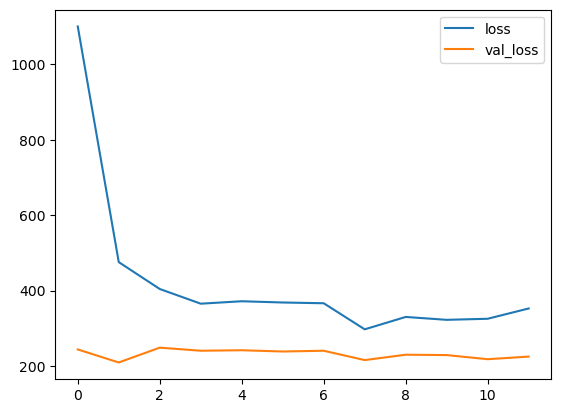

In [309]:
# 시각화
plt.plot(result.epoch, result.history['loss'], label='loss')
plt.plot(result.epoch, result.history['val_loss'], label='val_loss')
# plt.plot(result.epoch, result.history['mae'], label='mae')
# plt.plot(result.epoch, result.history['val_mae'], label='val_mae')
plt.legend()
plt.show()

### [2-4] 평가
- evaluate() 메서드 사용
    - 파라미터 : test_data, test_target
    - 반환값 : loss, compile()의 metrics에서 설정한 항목 지표값

In [310]:
model_eval = model.evaluate(x_test, y_test)
model_eval

4/4 [==============================] - 0s 1ms/step - loss: 224.8601 - mae: 12.4969


[224.860107421875, 12.496926307678223]

### [2-5] 예측
- predict() 메서드 사용

In [311]:
pre = model.predict(x_train[:1])
pre

1/1 [==============================] - 0s 37ms/step


array([[10.862103]], dtype=float32)